In [1]:
from tensorflow.keras import datasets, layers, models, Input
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tf.__version__

'2.17.1'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

In [4]:
model = models.Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
logdir='log'

In [6]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [7]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x=train_images,
         y=train_labels,
         epochs=5,
         validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8793 - loss: 0.3701 - val_accuracy: 0.9838 - val_loss: 0.0498
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0495 - val_accuracy: 0.9849 - val_loss: 0.0457
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0326 - val_accuracy: 0.9861 - val_loss: 0.0419
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9917 - loss: 0.0253 - val_accuracy: 0.9902 - val_loss: 0.0321
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9897 - val_loss: 0.0324


In [8]:
y_true = test_labels
y_pred = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [9]:
y_pred_labels = np.argmax(y_pred, axis=1)

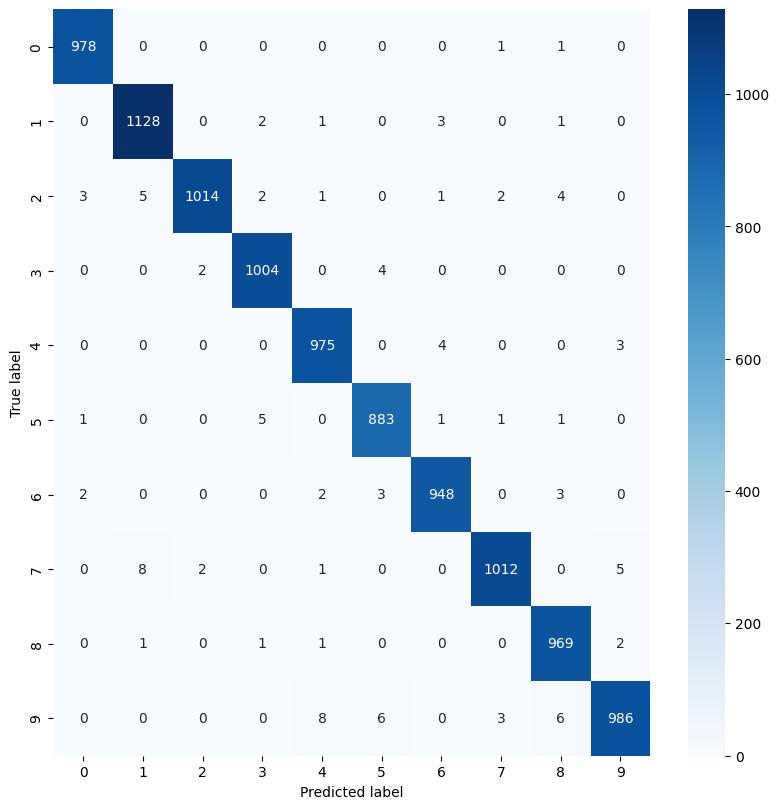

In [20]:
cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_labels).numpy()
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

figure = plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label') 
plt.xlabel('Predicted label')
plt.show()

In [21]:
cm

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1128,    0,    2,    1,    0,    3,    0,    1,    0],
       [   3,    5, 1014,    2,    1,    0,    1,    2,    4,    0],
       [   0,    0,    2, 1004,    0,    4,    0,    0,    0,    0],
       [   0,    0,    0,    0,  975,    0,    4,    0,    0,    3],
       [   1,    0,    0,    5,    0,  883,    1,    1,    1,    0],
       [   2,    0,    0,    0,    2,    3,  948,    0,    3,    0],
       [   0,    8,    2,    0,    1,    0,    0, 1012,    0,    5],
       [   0,    1,    0,    1,    1,    0,    0,    0,  969,    2],
       [   0,    0,    0,    0,    8,    6,    0,    3,    6,  986]])

In [25]:
# Calcular Falsos Positivos (FP) e Falsos Negativos (FN)
fp = (np.sum(cm, axis=0) - np.diag(cm)).sum()
fn = (np.sum(cm, axis=1) - np.diag(cm)).sum()

print(f"Falsos Positivos (FP) totais: {fp}")
print(f"Falsos Negativos (FN) totais: {fn}")


Falsos Positivos (FP) totais: 103
Falsos Negativos (FN) totais: 103


In [29]:
vp = np.diag(cm).sum()
vn = vp

In [41]:
sensibilidade_recall = vp/(vp+fn)
especificidade = vn/(vn+fp)
acuracia = (vp)/(vp+fp)
precisao = vp/(vp+fp)
f_score = 2*(precisao*sensibilidade_recall)/(precisao+sensibilidade_recall)
print('Sensibilidade (recall):', sensibilidade_recall)
print('Especificidade:', especificidade)
print('Acurácia:', acuracia)
print('Precisão:', precisao)
print('F-Score:', f_score)

Sensibilidade (recall): 0.9897
Especificidade: 0.9897
Acurácia: 0.9897
Precisão: 0.9897
F-Score: 0.9897


In [34]:
rec = recall_score(y_true, y_pred_labels,average='micro')
rec

0.9897

In [35]:
prec = precision_score(y_true, y_pred_labels,average='micro')
prec

0.9897

In [36]:
f = f1_score(y_true, y_pred_labels,average='micro')
f

0.9897

In [39]:
ac = accuracy_score(y_true, y_pred_labels)
ac

0.9897